In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Data exploration

In [2]:
students_df = pd.read_csv('data/studentInfo.csv')
students_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [32]:
students_df.isnull().sum()

code_module                 0
code_presentation           0
id_student                  0
gender                      0
region                      0
highest_education           0
imd_band                 1111
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
final_result_num            0
disability_num              0
highest_education_num       0
dtype: int64

In [22]:
students_df.shape

(32593, 12)

In [23]:
students_df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [24]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


array([[<Axes: title={'center': 'id_student'}>,
        <Axes: title={'center': 'num_of_prev_attempts'}>],
       [<Axes: title={'center': 'studied_credits'}>, <Axes: >]],
      dtype=object)

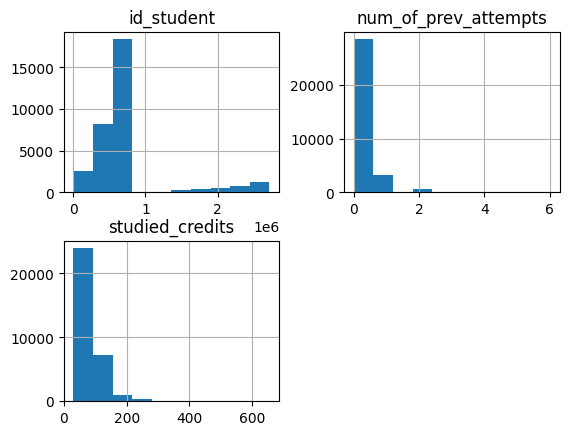

In [25]:
students_df.hist()

AttributeError: 'NoneType' object has no attribute 'set_size_inches'

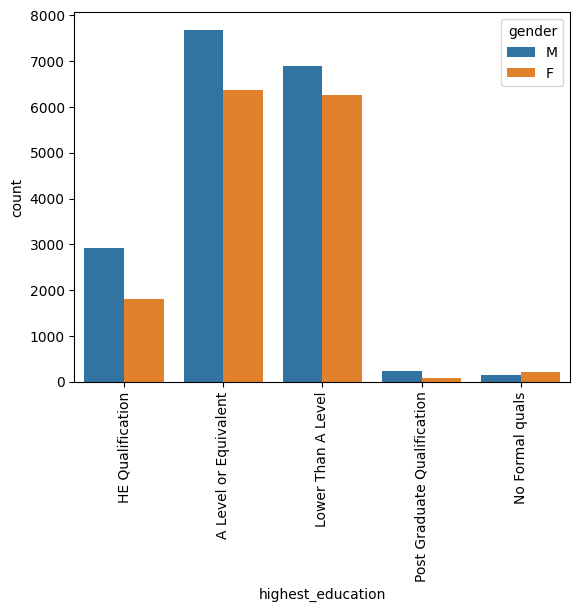

In [53]:
import seaborn as sns
%matplotlib inline


for column in ['highest_education', 'gender', 'region', 'imd_band']:
    sns.countplot(
        data=students_df,
        x = students_df[column],
        hue=students_df['gender']
    ).tick_params(axis='x', rotation=90)
    # students_df[column].value_counts(sort=False).plot(kind='bar', figsize=(6,3))
    plt.show()  

## Encode string columns to numerical

In [27]:
students_df['final_result'].value_counts()


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [28]:
students_df['disability'].value_counts()

N    29429
Y     3164
Name: disability, dtype: int64

In [61]:
# binary encoding
students_df['gender_num'] = pd.get_dummies(students_df['gender'], columns=['gender'], drop_first=True)
students_df['disability_num'] = pd.get_dummies(students_df['disability'], columns=['disability'], drop_first=True)
students_df['final_result_num'] = students_df['final_result']=='Pass'


In [62]:
students_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_result_num,disability_num,highest_education_num,age_band_num,gender_num
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,True,0,3,65.0,1
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,True,0,3,45.0,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,False,1,2,45.0,0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,True,0,2,45.0,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,True,0,1,17.5,0


In [30]:
from sklearn.preprocessing import LabelEncoder
display(students_df['highest_education'].value_counts())

education_order = {'No Formal quals':0, 'Lower Than A Level':1, 'A Level or Equivalent':2, 'HE Qualification':3, 'Post Graduate Qualification':4}
students_df['highest_education_num'] = students_df['highest_education'].map(education_order)

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

In [31]:
students_df[['highest_education', 'highest_education_num']].drop_duplicates().sort_values('highest_education_num')

,highest_education,highest_education_num
1083,No Formal quals,0
4,Lower Than A Level,1
2,A Level or Equivalent,2
0,HE Qualification,3
9,Post Graduate Qualification,4


In [57]:
display(students_df['age_band'].value_counts())

age_order = {'0-35':35/2, '35-55':(35+55)/2, '55<=':65}
students_df['age_band_num'] = students_df['age_band'].map(age_order)

students_df[['age_band', 'age_band_num']].drop_duplicates().sort_values('age_band_num')

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

,age_band,age_band_num
4,0-35,17.5
1,35-55,45.0
0,55<=,65.0


In [ ]:
# todo: imd_band